In [1]:
import pandas as pd
# import pandasql as ps
import matplotlib.pyplot as plt
# Import argsort
from numpy import argsort
from Functions.connection.connection import *
from Functions.AlertP1.data_cleaning import *
from Functions.AlertP1.features import *
from Functions.analysis.step_analysis import *
from Functions.AlertP1.dummy_features import *
from Functions.Models.Random_forest import *
from Functions.Models.evaluation import *
from Functions.NLP.data_with_nlp import *




## Connection to databse

In [2]:
alertP1=connection("/Users/MarouanKamoun/Desktop/HGO pbl/credentials.csv")

Tables: [('ConsultaUrgencia_doentespedidosconsultaNeurologia2012',), ('consultaneurologia2012',), ('consultaneurologia201216anon_true',), ('hgo_data_032023',)]
776


## Data cleaning

In [3]:
#changing columns with date to a datetime
date_format_alertP1(alertP1)
#change the blank values in proveniencia and priority to unknown
replace_blank(alertP1)
#merge duplicated entity
entity_duplicated(alertP1)
#changing the text to lower case
lowering_text(alertP1)
#create a column with the output of a referral and select the refused and accepted ones
alertP1=result(alertP1)

c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['PROVENIENCIA'][alertP1['PROVENIENCIA']=='']='unknown'
c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['CTH_PRIOR'][alertP1['CTH_PRIOR']=='']='unknown'
c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

## Creating new columns for non NLP features 

In [4]:
alertP1=bef_accepted(alertP1)
class_area(alertP1)
text_length(alertP1)
referral_steps(alertP1)
speciality(alertP1)
alertP1=unit(alertP1)

c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\features.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['step'][alertP1['step']>=3]='3+'


## add NLP features

In [5]:
#add symptoms column
symptoms_column(alertP1)
#add exams columns
exams(alertP1)
#add comorbidities columns
comorbidities(alertP1)
#add medication columns
medication_column(alertP1)
medication_count(alertP1)
medication_concentration(alertP1)
synonyms(alertP1)
#apply lemmatization and removing stop words
clean_text(alertP1)
alertP1

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MarouanKamoun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MarouanKamoun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,PROVENIENCIA,COD_CTH_PRIOR,CTH_PRIOR,...,comorbidity_identified,medication_level_1,medication_level_2,medication_level_3,medication_count,medication_concentration,count_Alteração,count_Agravamento,count_HGO,count_Estável
1499,01-12-1GBF,MIVNNVE,LPHRRVQP,,0,,OUTRA,SAM,,unknown,...,0,0,0,0,0,0.000000,0,0,0,0
959,0F-12-1GAG,LLCCECB,LRHHVTQR,GAGBESD,3151571,USF FFMAIS-CS SEIXAL,CS/USF,CTH,,unknown,...,0,0,2,0,2,0.002829,1,0,0,0
868,0F-12-1GAS,LLCJILJ,LQHOOLQV,,0,,OUTRA,SAM,,unknown,...,1,0,0,0,0,0.000000,0,0,0,0
1519,0S-12-1GBF,MIVEMLC,LRHPVSVU,ZHEEZFSC,3151571,USF FFMAIS-CS SEIXAL,CS/USF,CTH,3,Normal,...,0,1,9,6,16,0.005291,3,4,0,0
4844,"A,CBE+SA",VMNNVICN,LQHQLSHL,,0,,OUTRA,SAM,,unknown,...,0,0,0,0,0,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5650,ZZZZB,BIJJVNJN,LRHRUSHO,ZHCBZAHZ,3150572,USF MONTE DA CAPARICA,CS/USF,CTH,,unknown,...,0,0,0,0,0,NaN,0,0,0,0
6526,ZZZZHA,BMJIDEDD,LQHSSUHH,GEASHED,3152471,USF SERVIR SAUDE-CS,CS/USF,CTH,3,Normal,...,0,0,0,0,0,NaN,0,0,0,0
6528,ZZZZSD,BMJIDCLL,LRHOUTQL,,0,,OUTRA,SAM,,unknown,...,0,0,0,0,0,NaN,0,0,0,0
6527,ZZZZSH,BMJIDCLJ,LQHLTUVQ,,0,,OUTRA,SAM,,unknown,...,0,0,0,0,0,NaN,0,0,0,0


## structured data with dummies

In [6]:
alertP1=alertP1.sort_values('DATA_RECEPCAO')
data=structured_data_dummies(alertP1)
print(data.columns)
data

Index([               'ID_DOENTE',                 'PROCESSO',
                 'COD_REFERENCIA',                   'COD_PZ',
            'COD_UNID_SAUDE_PROV',                'UNID_PROV',
                      'TIPO_UNID',            'COD_CTH_PRIOR',
                      'CTH_PRIOR',        'COD_MOTIVO_RECUSA',
              'DES_MOTIVO_RECUSA',        'COD_ESPECIALIDADE',
              'DES_ESPECIALIDADE',               'agrupadora',
                 'OUTRA_ENTIDADE',            'DATA_RECEPCAO',
                     'DATA_ENVIO',             'DATA_RETORNO',
                       'NUM_TAXA',                   'ESTADO',
                  'DATA_MARCACAO',          'DATA_REALIZACAO',
                    'OBSERVACOES',              'Mês_entrada',
                    'Ano_entrada',        'trata data recusa',
                   'resume saída',                'mês_saida',
                      'ano_saida',                    'Texto',
                     'clean_text',                   'r

,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,COD_CTH_PRIOR,CTH_PRIOR,COD_MOTIVO_RECUSA,...,unknown,Other specialities,2,3+,HOSP,UCSP,USF A,USF B,outro,not accepted before
9915,SEAFHB,BBLVVLDC,LOHHHLOV,SFGHADG,3150305,UCSP RAINHA D. LEONOR,CS/USF,,unknown,0,...,0,1,0,0,0,1,0,0,0,1
6944,ZDGGGA,BMJNMVVJ,LOHHHHRS,,0,,OUTRA,,unknown,0,...,1,0,0,0,0,0,0,0,0,1
8937,EESHSS,BCVNLDCN,LOHHHOVP,SSDBCAZ,3150305,UCSP RAINHA D. LEONOR,CS/USF,,unknown,0,...,0,1,0,0,0,1,0,0,0,1
3454,CSSBHC,VJMCILIL,LOHHHOOO,SFDZSZB,3150502,CHARNECA DA CAPARICA,CS/USF,,unknown,15,...,0,0,0,0,0,0,1,0,0,1
2078,AESBSC,NINBJJC,LOHHHPTO,,0,,OUTRA,,unknown,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7353,ZSGCCF,BMJCJLIJ,LSHVLHUO,ZEFHCECF,3150672,USF FEIJO-CS COVA DA PIEDADE,CS/USF,3,Normal,0,...,0,0,1,0,0,0,0,1,0,0
9425,EBESGE,BDVDJJIB,LSHVLLVV,,0,,OUTRA,,unknown,0,...,0,1,0,0,0,0,0,0,0,1
5513,GFHDGC,VENBCMMN,LTHHHOTL,ZEFZEDDG,3150371,USF S JOAO DO PRAGAL-CS ALMADA,CS/USF,3,Normal,0,...,0,0,0,0,0,0,0,1,0,1
6424,FCDEF,BIJIMMIJ,LSHVLOQU,,0,,OUTRA,3,Normal,0,...,0,1,1,0,0,0,0,0,0,0


In [7]:
data=data[data['text_length']>0]
#data['medication_count']=data['medication_level_1']+data['medication_level_2']+data['medication_level_3']
#data['medication_concentration']=data['medication_count']/data['text_length']
data

,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,COD_CTH_PRIOR,CTH_PRIOR,COD_MOTIVO_RECUSA,...,unknown,Other specialities,2,3+,HOSP,UCSP,USF A,USF B,outro,not accepted before
630,EGBZZB,VLNMEEM,LOHHHSHT,SSDBHEA,3150502,CHARNECA DA CAPARICA,CS/USF,,unknown,0,...,0,0,0,0,0,0,1,0,0,1
1537,FGSEDD,MIVCNDB,LOHHLSTU,,0,,OUTRA,,unknown,7,...,1,0,0,0,0,0,0,0,0,1
1103,ESSSBD,LLDDNEN,LOHHLTSH,SCCBZCA,3150571,USF SOBREDA-CS COSTA CAPARICA,CS/USF,,unknown,0,...,0,1,0,0,0,0,0,1,0,1
752,DECZCS,VLEVCVE,LOHHLTOU,SCCDEGG,3151672,USF AMORA SAUDAVEL,CS/USF,,unknown,0,...,0,0,0,0,0,0,0,1,0,1
938,FEZCGS,LLCNMCN,LOHHLTOL,SCASHFF,3151571,USF FFMAIS-CS SEIXAL,CS/USF,,unknown,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606,FFDSBH,MILLLCJ,LSHUVULH,ZESCCSSF,3152401,UCSP CORROIOS,CS/USF,2,Prioritário,0,...,0,0,0,0,0,1,0,0,0,1
1335,EBBCSA,"I,IJME+LI",LSHVHLLH,ZESBAHAD,3150571,USF SOBREDA-CS COSTA CAPARICA,CS/USF,3,Normal,0,...,0,0,0,0,0,0,0,1,0,1
1177,ZHZFA,ILBIBCL,LSHVHLHP,ZESBFBCB,3152400,CORROIOS (SEDE),CS/USF,3,Normal,0,...,0,0,0,1,0,1,0,0,0,0
1332,FDSADA,IIJMMNJ,LSHVHSUR,ZESGGDFH,3150572,USF MONTE DA CAPARICA,CS/USF,,unknown,7,...,0,0,0,0,0,0,0,1,0,1


## Random forest text variables

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#split dataset in features and target variable// Question: is it the right option?
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto','clean_text']
X = data.drop(eliminate_cols,axis=1)# Features
y = data.result # Target variable
features=X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=16,shuffle=False)
# instantiate the model (using the default parameters)
logreg =RandomForestClassifier(n_estimators=500, random_state=42)
# fit the model with data
clf=logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
df = pd.DataFrame(features, columns =['Feature'])
df['coefficients']=clf.feature_importances_.T
df.sort_values(by='coefficients',ascending=False)


,Feature,coefficients
0,text_length,0.340694
1,symptom_1,0.096625
9,medication_concentration,0.058630
18,Other specialities,0.056897
2,symptom_0,0.052426
17,unknown,0.040984
10,count_Alteração,0.038320
24,USF B,0.030563
8,medication_count,0.030262
26,not accepted before,0.024661


In [19]:
y_df = pd.DataFrame(y_test)
distribution = y_df.value_counts()
distribution

result
1         211
0         111
dtype: int64

In [28]:
def precision_at_k(y_true, y_pred, k):
    y_true = y_true.to_numpy()
    # Get the indices of the top k predictions
    top_k_indices = np.argsort(y_pred)[-k:]
    # Get the top k predictions
    top_k_predictions = y_true[top_k_indices]
    # Calculate precision@k
    precision = np.sum(top_k_predictions) / k
    return precision

metrics

Accuracy: 0.72
Recall: 0.90
Precision: 0.73
Precision@K: 0.72
              precision    recall  f1-score   support

     refused       0.66      0.37      0.47       111
    accepted       0.73      0.90      0.81       211

    accuracy                           0.72       322
   macro avg       0.70      0.63      0.64       322
weighted avg       0.71      0.72      0.69       322



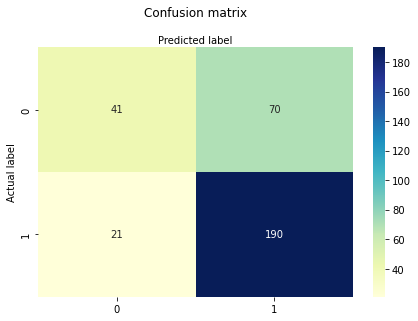

In [43]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
# Evaluate the recall of the model
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))

precision_k = precision_at_k(y_test, y_pred, 211)
print("Precision@K: {:.2f}".format(precision_k))
# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))

Optimal threshold: 0.34


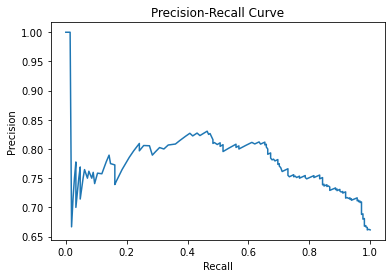

In [44]:
y_scores = logreg.predict_proba(X_test)[:, 1]
from sklearn.metrics import precision_recall_curve, f1_score

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate the F1 score for each threshold
f1_scores = [f1_score(y_test, (y_scores >= t).astype(int)) for t in thresholds]

# Find the threshold that maximizes the F1 score
optimal_threshold = thresholds[np.argmax(f1_scores)]

print(f'Optimal threshold: {optimal_threshold:.2f}')


# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Accuracy: 0.72
Recall: 0.97
Precision: 0.71
Precision@K: 0.71
              precision    recall  f1-score   support

     refused       0.79      0.24      0.37       111
    accepted       0.71      0.97      0.82       211

    accuracy                           0.72       322
   macro avg       0.75      0.61      0.60       322
weighted avg       0.74      0.72      0.66       322



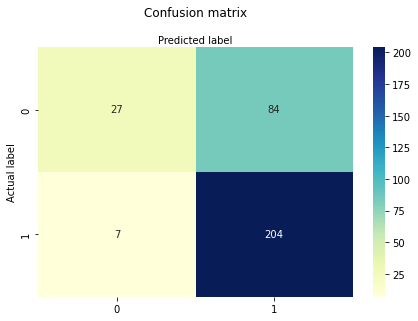

In [24]:
threshold = 0.34

predicted_proba = logreg.predict_proba(X_test)
y_pred = (predicted_proba [:,1] >= threshold).astype('int')

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
# Evaluate the recall of the model
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))

precision_k = precision_at_k(y_test, y_pred, 211)
print("Precision@K: {:.2f}".format(precision_k))
# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))

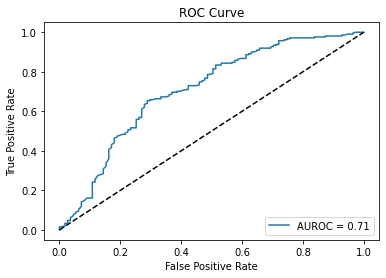

In [33]:
from sklearn.metrics import roc_curve, auc
y_scores = logreg.predict_proba(X_test)[:, 1]
# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Calculate the AUROC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='AUROC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [34]:
# Calculate the confusion matrix for each threshold
cms = [confusion_matrix(y_test, (y_scores >= t).astype(int)) for t in thresholds]

# Calculate sensitivity and specificity for each threshold
sensitivity = [cm[1, 1] / (cm[1, 1] + cm[1, 0]) for cm in cms]
specificity = [cm[0, 0] / (cm[0, 0] + cm[0, 1]) for cm in cms]

# Calculate balanced accuracy for each threshold
balanced_accuracy = [(s + sp) / 2 for s, sp in zip(sensitivity, specificity)]

# Find the threshold that maximizes balanced accuracy
optimal_threshold = thresholds[np.argmax(balanced_accuracy)]

print(f'Optimal threshold: {optimal_threshold:.2f}')

Optimal threshold: 0.76


Accuracy: 0.66
Recall: 0.64
Precision: 0.81
Precision@K: 0.72
              precision    recall  f1-score   support

     refused       0.51      0.71      0.59       111
    accepted       0.81      0.64      0.71       211

    accuracy                           0.66       322
   macro avg       0.66      0.68      0.65       322
weighted avg       0.71      0.66      0.67       322



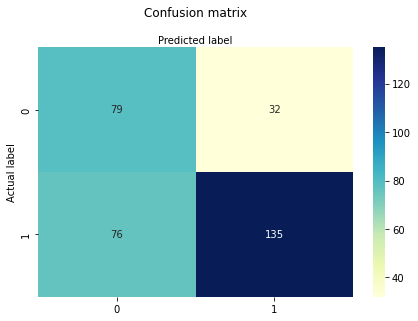

In [35]:
threshold = 0.76

predicted_proba = logreg.predict_proba(X_test)
y_pred = (predicted_proba [:,1] >= threshold).astype('int')

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
# Evaluate the recall of the model
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))

precision_k = precision_at_k(y_test, y_pred, 211)
print("Precision@K: {:.2f}".format(precision_k))
# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))

## Cohen's Kappa

In [36]:
from sklearn.metrics import cohen_kappa_score

# Calculate Cohen's kappa for each threshold
kappas = [cohen_kappa_score(y_test, (y_scores >= t).astype(int)) for t in thresholds]

# Find the threshold that maximizes Cohen's kappa
optimal_threshold = thresholds[np.argmax(kappas)]

print(f'Optimal threshold: {optimal_threshold:.2f}')

Optimal threshold: 0.62


Accuracy: 0.71
Recall: 0.83
Precision: 0.75
Precision@K: 0.76
              precision    recall  f1-score   support

     refused       0.60      0.47      0.53       111
    accepted       0.75      0.83      0.79       211

    accuracy                           0.71       322
   macro avg       0.67      0.65      0.66       322
weighted avg       0.70      0.71      0.70       322



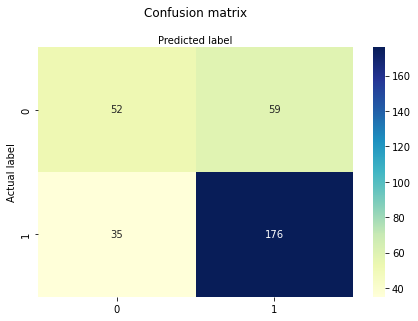

In [37]:
threshold = 0.62

predicted_proba = logreg.predict_proba(X_test)
y_pred = (predicted_proba [:,1] >= threshold).astype('int')

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
# Evaluate the recall of the model
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))

precision_k = precision_at_k(y_test, y_pred, 211)
print("Precision@K: {:.2f}".format(precision_k))
# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))

In [39]:
df = pd.DataFrame(features, columns =['Feature'])
df['coefficients']=clf.feature_importances_.T
df.sort_values(by='coefficients',ascending=False)

,Feature,coefficients
0,text_length,0.340694
1,symptom_1,0.096625
9,medication_concentration,0.058630
18,Other specialities,0.056897
2,symptom_0,0.052426
17,unknown,0.040984
10,count_Alteração,0.038320
24,USF B,0.030563
8,medication_count,0.030262
26,not accepted before,0.024661


In [45]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, auc, confusion_matrix, cohen_kappa_score

def evaluate_thresholds(y_pred, y_test, k = 211):
    #Precion@k
    def precision_at_k(y_true, y_pred, k):
        y_true = y_true.to_numpy()
        # Get the indices of the top k predictions
        top_k_indices = np.argsort(y_pred)[-k:]
        # Get the top k predictions
        top_k_predictions = y_true[top_k_indices]
        # Calculate precision@k
        precision = np.sum(top_k_predictions) / k
        return precision

    # Default threshold (0.5)
    default_threshold = 0.5
    default_y_pred_binary = (y_pred >= default_threshold).astype(int)
    default_accuracy = accuracy_score(y_test, default_y_pred_binary)
    default_recall = recall_score(y_test, default_y_pred_binary)
    default_precision = precision_score(y_test, default_y_pred_binary)
    default_precision_at_k = precision_at_k(y_test, default_y_pred_binary, k)
    
    # Define thresholds
   

    # Precision-Recall trade-off
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    f1_scores = 2 * precision * recall / (precision + recall)
    best_index = pd.Series(f1_scores).idxmax()
    pr_threshold = thresholds[best_index]
    pr_y_pred_binary = (y_pred >= pr_threshold).astype(int)
    pr_accuracy = accuracy_score(y_test, pr_y_pred_binary)
    pr_recall = recall_score(y_test, pr_y_pred_binary)
    pr_precision = precision_score(y_test, pr_y_pred_binary)
    pr_precision_at_k = precision_at_k(y_test, pr_y_pred_binary, k)
    
    thresholds = np.linspace(0, 1, 100)

    # Balanced Accuracy
    cms = [confusion_matrix(y_test, (y_pred >= t).astype(int)) for t in thresholds]
    sensitivity = [cm[1, 1] / (cm[1, 1] + cm[1, 0]) for cm in cms]
    specificity = [cm[0, 0] / (cm[0, 0] + cm[0, 1]) for cm in cms]
    balanced_accuracy = [(s + sp) / 2 for s, sp in zip(sensitivity, specificity)]
    ba_threshold = thresholds[np.argmax(balanced_accuracy)]
    ba_y_pred_binary = (y_pred >= ba_threshold).astype(int)
    ba_accuracy = accuracy_score(y_test, ba_y_pred_binary)
    ba_recall = recall_score(y_test, ba_y_pred_binary)
    ba_precision = precision_score(y_test, ba_y_pred_binary)
    ba_precision_at_k = precision_at_k(y_test, ba_y_pred_binary,k)
    
    # Cohen's Kappa
    kappas = [cohen_kappa_score(y_test, (y_pred >= t).astype(int)) for t in thresholds]
    kappa_threshold = thresholds[np.argmax(kappas)]
    kappa_y_pred_binary = (y_pred >= kappa_threshold).astype(int)
    kappa_kappa = cohen_kappa_score(y_test, kappa_y_pred_binary)
    kappa_accuracy = accuracy_score(y_test, kappa_y_pred_binary)
    kappa_recall = recall_score(y_test, kappa_y_pred_binary)
    kappa_precision = precision_score(y_test, kappa_y_pred_binary)
    kappa_precision_at_k = precision_at_k(y_test, kappa_y_pred_binary, k)

    # Limit to K
    limit_to_k_threshold = np.sort(y_pred)[-k]
    limit_to_k_y_pred_binary = (y_pred >= limit_to_k_threshold).astype(int)
    limit_to_k_accuracy = accuracy_score(y_test, limit_to_k_y_pred_binary)
    limit_to_k_recall = recall_score(y_test, limit_to_k_y_pred_binary)
    limit_to_k_precision = precision_score(y_test, limit_to_k_y_pred_binary)
    limit_to_k_precision_at_k = precision_at_k(y_test, limit_to_k_y_pred_binary, k)
    
    # Create output dataframe
    data = {
        'Analysis': ['Default', 'Precision-Recall trade-off', 'Balanced Accuracy', "Cohen's Kappa", 'Limit to K'],
        'Threshold': [round(default_threshold, 2), round(pr_threshold, 2), round(ba_threshold, 2), round(kappa_threshold, 2), round(limit_to_k_threshold, 2)],
        'Accuracy': [round(default_accuracy, 2), round(pr_accuracy, 2), round(ba_accuracy, 2), round(kappa_accuracy, 2), round(limit_to_k_accuracy, 2)],
        'Recall': [round(default_recall, 2), round(pr_recall, 2), round(ba_recall, 2), round(kappa_recall, 2), round(limit_to_k_recall, 2)],
        'Precision': [round(default_precision, 2), round(pr_precision, 2), round(ba_precision, 2), round(kappa_precision, 2), round(limit_to_k_precision, 2)],
        'Precision@211': [round(default_precision_at_k, 2), round(pr_precision_at_k, 2), round(ba_precision_at_k, 2), round(kappa_precision_at_k, 2), round(limit_to_k_precision_at_k, 2)]
    }
    
    df = pd.DataFrame(data)
    return df

In [46]:
y_scores = logreg.predict_proba(X_test)[:, 1]
evaluate_thresholds(y_scores, y_test)

,Analysis,Threshold,Accuracy,Recall,Precision,Precision@211
0,Default,0.50,0.72,0.90,0.73,0.72
1,Precision-Recall trade-off,0.34,0.72,0.97,0.71,0.72
2,Balanced Accuracy,0.76,0.67,0.65,0.81,0.72
3,Cohen's Kappa,0.76,0.67,0.65,0.81,0.72
4,Limit to K,0.68,0.68,0.75,0.75,0.75


In [34]:
p_value(X,y)

,Feature,p_value
0,text_length,1.491237e-30
1,symptom_1,5.731039e-29
2,symptom_0,2.359101e-10
3,medication_level_1,8.071507e-11
4,medication_level_2,7.473917e-15
5,medication_level_3,1.799237e-06
6,outside area,1.106719e-27
7,SAM,1.051842e-04
8,SON,7.611581e-04
9,unknown,2.499057e-31


## Logistic without high p-value

In [35]:

eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto','clean_text','outro','UCSP','3+']
X = data.drop(eliminate_cols,axis=1)# Features
y = data.result # Target variable
features=X.columns
#log_regression is defined in functions
y_pred,coefficients,X_train, X_test, y_train, y_test=random_forest(X,y)
df = pd.DataFrame(features, columns =['Feature'])
df['coefficients']=coefficients.T
df


,Feature,coefficients
0,text_length,0.488309
1,symptom_1,0.114867
2,symptom_0,0.061865
3,medication_level_1,0.037632
4,medication_level_2,0.040082
5,medication_level_3,0.023828
6,outside area,0.010928
7,SAM,0.016210
8,SON,0.002523
9,unknown,0.020323


Accuracy: 0.717391304347826
Recall: 0.6562700140899194
Precision: 0.6859756097560976
              precision    recall  f1-score   support

     refused       0.62      0.46      0.53       111
    accepted       0.75      0.85      0.80       211

    accuracy                           0.72       322
   macro avg       0.69      0.66      0.66       322
weighted avg       0.71      0.72      0.71       322



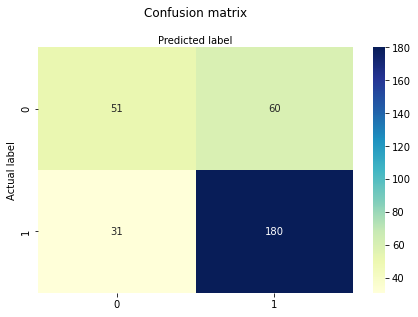

In [36]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)
# Evaluate the precision of the model
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))


In [23]:
p_value(X,y)


,Feature,p_value
0,text_length,1.491237e-30
1,symptom_1,5.731039e-29
2,symptom_0,2.359101e-10
3,exam_identified,4.201840e-10
4,comorbidity_identified,8.156181e-05
5,medication_level_1,8.071507e-11
6,medication_level_2,7.473917e-15
7,medication_level_3,1.799237e-06
8,outside area,1.106719e-27
9,SAM,1.051842e-04
